# Monthly Sales Forecasting – Retail Business Case

## Objective
Forecast monthly sales to support inventory, staffing, and budgeting decisions.

In [39]:
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from src.prepare_data import main as prepare_data
from src.models import (
    make_monthly_series,
    train_test_split_time_series,
    fit_sarima,
    predict_sarima,
    fit_prophet,
    predict_prophet,
)

### Load Processed Data

In [40]:
monthly_sales = pd.read_csv("../data/processed/monthly_sales.csv")
monthly_sales.head()

,date,sales
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


### Exploratory Data Analysis

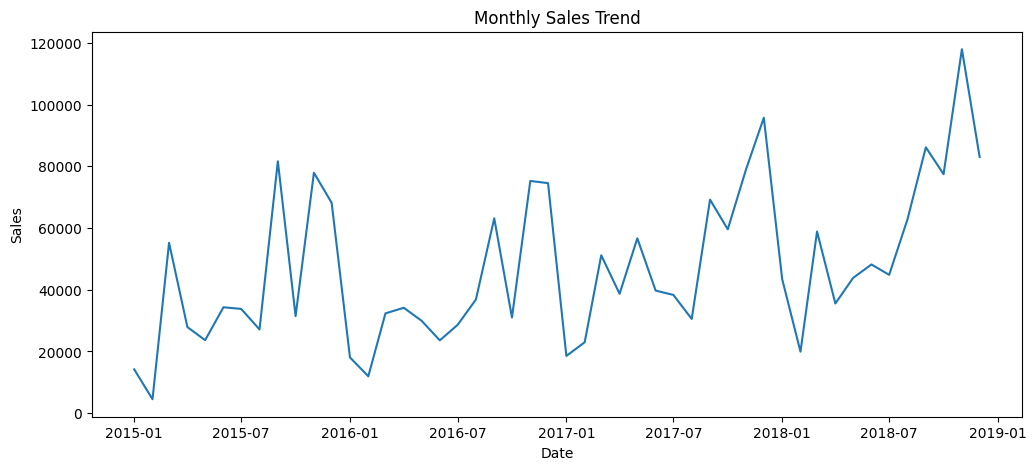

In [41]:
monthly_sales["date"] = pd.to_datetime(monthly_sales["date"])
ts = monthly_sales.set_index("date")["sales"]

plt.figure(figsize=(12, 5))
plt.plot(ts)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

### Train-Test Split

In [42]:
train, test = train_test_split_time_series(ts)
len(train), len(test)

(38, 10)

### Train Models

In [43]:
# Prepare time series
monthly_sales["date"] = pd.to_datetime(monthly_sales["date"])
ts = monthly_sales.set_index("date")["sales"]
ts = ts.asfreq("MS")  # important

# Train-test split
train, test = train_test_split_time_series(ts)

# SARIMA
sarima_fit = fit_sarima(train)
sarima_pred = predict_sarima(sarima_fit, len(test)).y_pred

# Prophet
prophet_model = fit_prophet(train)
prophet_pred = predict_prophet(prophet_model, train, len(test)).y_pred.iloc[-len(test):]

22:32:13 - cmdstanpy - INFO - Chain [1] start processing
22:32:13 - cmdstanpy - INFO - Chain [1] done processing


### Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error

print("SARIMA MAE:", mean_absolute_error(test, sarima_pred))
print("Prophet MAE:", mean_absolute_error(test, prophet_pred))

SARIMA MAE: 13455.424209832758
Prophet MAE: 9988.634937853123


### Forecast Future

In [45]:
prophet_full = fit_prophet(ts)
future_fc = predict_prophet(prophet_full, ts, 12)

future_fc.y_pred.iloc[-12:]

22:32:16 - cmdstanpy - INFO - Chain [1] start processing
22:32:17 - cmdstanpy - INFO - Chain [1] done processing


ds
2019-01-01     42548.142577
2019-02-01     33310.125087
2019-03-01     80304.673390
2019-04-01     49968.507582
2019-05-01     52137.420544
2019-06-01     59742.276130
2019-07-01     55962.672080
2019-08-01     55817.832638
2019-09-01    101744.801935
2019-10-01     69091.924687
2019-11-01    111918.972247
2019-12-01     94436.208128
Name: yhat, dtype: float64

### Business Insights

- Strong sales seasonality observed in Q4
- Inventory should be increased before Nov–Dec
- Prophet provides stable and interpretable forecasts